<a href="https://colab.research.google.com/github/jwavalosq/Analytics-on-Finance/blob/main/Analysis_SVB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

Silicon Valley Bank (SVB) is an specialized high-tech commercial bank in Santa Clara, California. It primarily serves technology, life sciences, and venture capital clients.

In March 2023, SVB was shut down by the by the California Department of Financial Protection and Innovation after its investments greatly decreased in value and its depositors withdrew large amounts of money, among other factors.

But, how do we analyze what happened to SVB through data analytics and descriptive statistics that will give us conclusions regarding the collapse of one of the most important financial institutions among high-tech startups in Silicon Valley and California? Let's find out.

SVB's financial assets and investments came to an earthqueake due to three main causes:

1. The take of larger deposits from startups and Venture Capitalists.

2. Investing those deposits in bonds.

3. Losing money on those bonds while a simultaneus deposit withdraw happend suddenly.

But, aren't bonds  "safe" investment assets? Most of these bond investments are Treasury bonds and fairly safe Mortgage-backed securities. So what went wrong?

Tipically, or as it happens in some conventional banks still in these days, a bank would collect a lot of cash deposits from people (and institutions), who want to keep their money safe at the bank, and the bank would then invest that money in bonds that would fetch a healthy yield.
The term investing in bonds means lending money to a bond-issuer (eg: US Government, for Treasury bonds) who will pay it back as Principal and Interest.

- The Principal payment is the return of the bond debt taken by the bond-issuer (Principal payment is paid at maturity of the bond).

- The interest is tipically paid twice a year until bond maturity.

If we come up with an example, let's say a bank collected `$100B` in deposits and paid the depositors 1% interest rate (annualized rate) on their deposits.
Let's also say the bank invested in Treasury bonds that mature over several years (tipically 5 or 10 or 30). Some of the longer maturity bonds fetched a healthy interest rate back in the day. Let's say the bank invested in bonds that fetched a 6% interest rate. Thus, they collect a net yield of 5% annually on the $100B in deposits (=6%-1%, 1% is what the bank gives to their depositors).

5% of $100B sounds like an amazing business, doesn't it?

Let's break down the math behind bank's operations.

A bond has a time to maturity that we refer to as to maturity that we refer to as $T$ ($T$ can be 30 years, and actually you can also do $T = 1$ year, half a year or quarter of a year). We will focus on situations where $T$ is large (*Long-dated bonds*), the typical one being 30 years.

A bond also has a *coupon*. Back in the day, a bond holder would get paper coupons that they could take to the friendly lady at the office of the institutions who issued the bond, and she would give out the money stated on the coupon.

The coupon is the regular interest payment a bond-issuer must make for the money they borrowed from the bond investor (when issuing the bond to the investor).

So if the coupon (call it $C$) is 5% and a bond investor invested \$1M for maturity $T$ =$ 30 years, then each year (over 30 years), the friendly lady would give the bond investor `$1M * 5% = $50,000`.

Typical Treasury bonds pay the coupon twice a year, but to keep things simple, we will work with once-a-year coupon payments.

The coupon is tipically set to a value close to the prevailing market interest rate for the maturity of the bond (we call this market interest rate as the bond *yield*). So if the prevailing market interest rate (i.e., *yield*) for 30-year maturity was 6.1%, the bond-issuer would set the coupon to the nearby round number of 6%. To understand the relationship between maturity $T$, coupon $C$ and yield (Call it $y$), we have to do some simple math, and specifically, we need to understand the concept of *Price of a bond*.

Let us assume that the bond-investor is SVB Bank and the bond issuer is the US Government (Treasury bonds).

Simply put, the Price of a bond (refered to as $P$) is the Current Value of the future Interest (i.e., Coupon) and Principal payments. The Principal is the return of borrowed money (borrowed by the bond-issuer) and we refer to it as $B$. So, the bond-issuer has to pay the bank $B \cdot C$ as interest every year for $T$ years, also has to pay the principal $B$.

We've already said that the conceptual way to think about yield $y$ is that it's the prevailing market interest rate for the maturity of the bond. The more opaque (computational) way to think about yield $y$ is that it's the rate at which we *discount* this collection of Interest and Principal payments in order to arrive at the Bond Price $P$. The calculation involves taking the future cash flows (Interest and Principal) and discounting it back to present time to arrive at current *Fair Value* of those future cash flows, and this current fair value is the Price, i.e., the money SVB Bank  would give to the bond-issuer (upon bond purchase) as a fair (current) value for future interest and Principal payments SVB bank would receive from the bond-issuer. There is a different (equivalent) way of thinking about it forward in time. SVB Bank is investing $P$ in the bond, and the bond-issuer gives SVB Bank cash flows in the future (Interest and Principal payments) which on average fetch an investment-growth rate (often refered to as *return*) equal to the yield $y$. Mathematically, this translates to:

$$P = \frac {B \cdot C} {1+y} + \frac {B \cdot C} {(1+y)^2} + \frac {B \cdot C} {(1 + y)^3} + \ldots + \frac {B \cdot C} {(1 + y)^{T-1}} + \frac {B \cdot C + B} {(1 + y)^T}$$


The powers of $(1+y)$ in the denominator are due to the fact that $y$ is considered to be an *annualized yield.*

**Remember that the yield on a bond at any point in time is just a reflection of the prevailing market interest rate for the maturity of that bond. Each maturity has it's own market interest rate, and so it gets it's own yield, which is what drives the Price of the bond for that maturity**.


The specific concept we are interest in now is the relationship between the yield $y$ and the Price $P$. We can see from the above equation that as yield increases, Price $P$ decreases. Let us write some code for this and plot this relationship:





In [3]:
def price_from_yield(
    yield_: float, #special keyword in Python for generators
    coupon: float,
    maturity: int,
    principal: float
) -> float:
  pv_of_interest: float = sum(principal*coupon/(1+yield_)**(i+1)
                                for i in range(maturity))
  pv_of_principal: float = principal/(1+yield_)**maturity
  return pv_of_interest + pv_of_principal


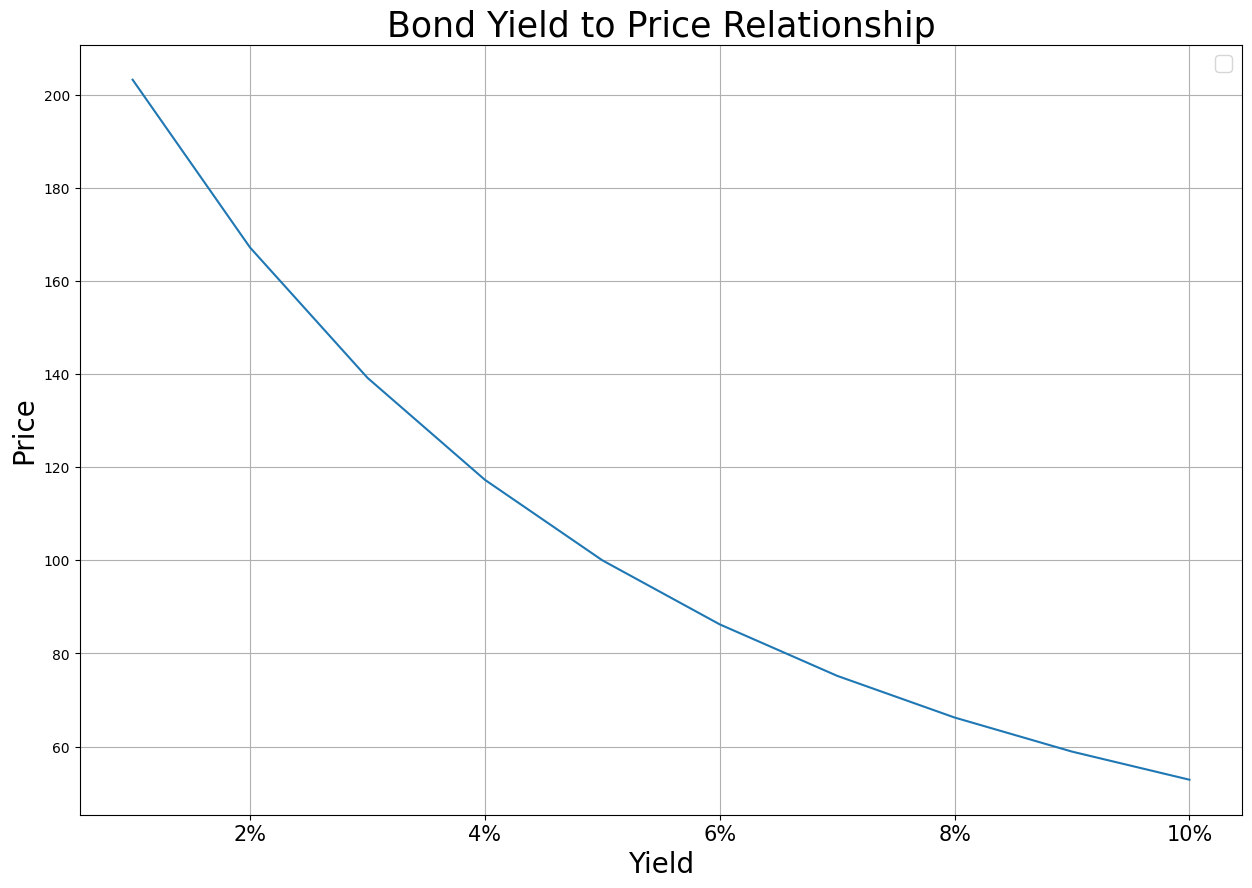

In [7]:
coupon: float = 0.05
maturity: int = 30
principal: float = 100.0

yields = [0.01 * n for n in range(1,11)]
prices = [price_from_yield(y, coupon, maturity, principal) for y in yields]

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

ffig, ax = plt.subplots(figsize=(15, 10))
plt.plot(yields, prices)
plt.xlabel("Yield", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Bond Yield to Price Relationship", fontsize=25)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.xticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)
plt.show()